# The goal of this project is to create a logistic regression using Python.

# Background:
# The ongoing research asked a data analyst to create a logistic regression model to predict, based on the parameters, if a patient has a 10-year risk of coronary heart disease (0 means no risk, 1 means some kind of risk).

# Code:
# 1. This code imports necessary libraries for Google Drive authentication, opens the file, processes, and examines it.

In [ ]:
import gspread
from google.auth import default
from google.colab import auth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Authentication
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the workbook
worksheet = gc.open('med_data').sheet1
rows = worksheet.get_all_values()
column_names = rows[0]
med_data = pd.DataFrame.from_records(rows[1:], columns=column_names)

# Clean the data
med_data.replace('NA', pd.NA, inplace=True)
null_rows = med_data[med_data.isnull().any(axis=1)]
null_rows_ind = null_rows.index
med_data.drop(null_rows_ind, inplace=True)
med_data = med_data.apply(pd.to_numeric, errors='coerce')

# Look at the table
med_data



,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3,0,0,0,0,1,0,187,141.0,81.0,24.96,80,81,0
4232,1,68,1,0,0,0,0,1,0,176,168.0,97.0,23.14,60,79,1
4233,1,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
4234,1,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0


# 2. This code will plot the variables on the histogram and box plot charts. It will check for outliers, assess whether the data is balanced, and examine if it follows a normal distribution.

* Note: Categorical data (Male, Education, Current Smoker, etc.) will not be plotted on the box plot

<Axes: xlabel='glucose'>

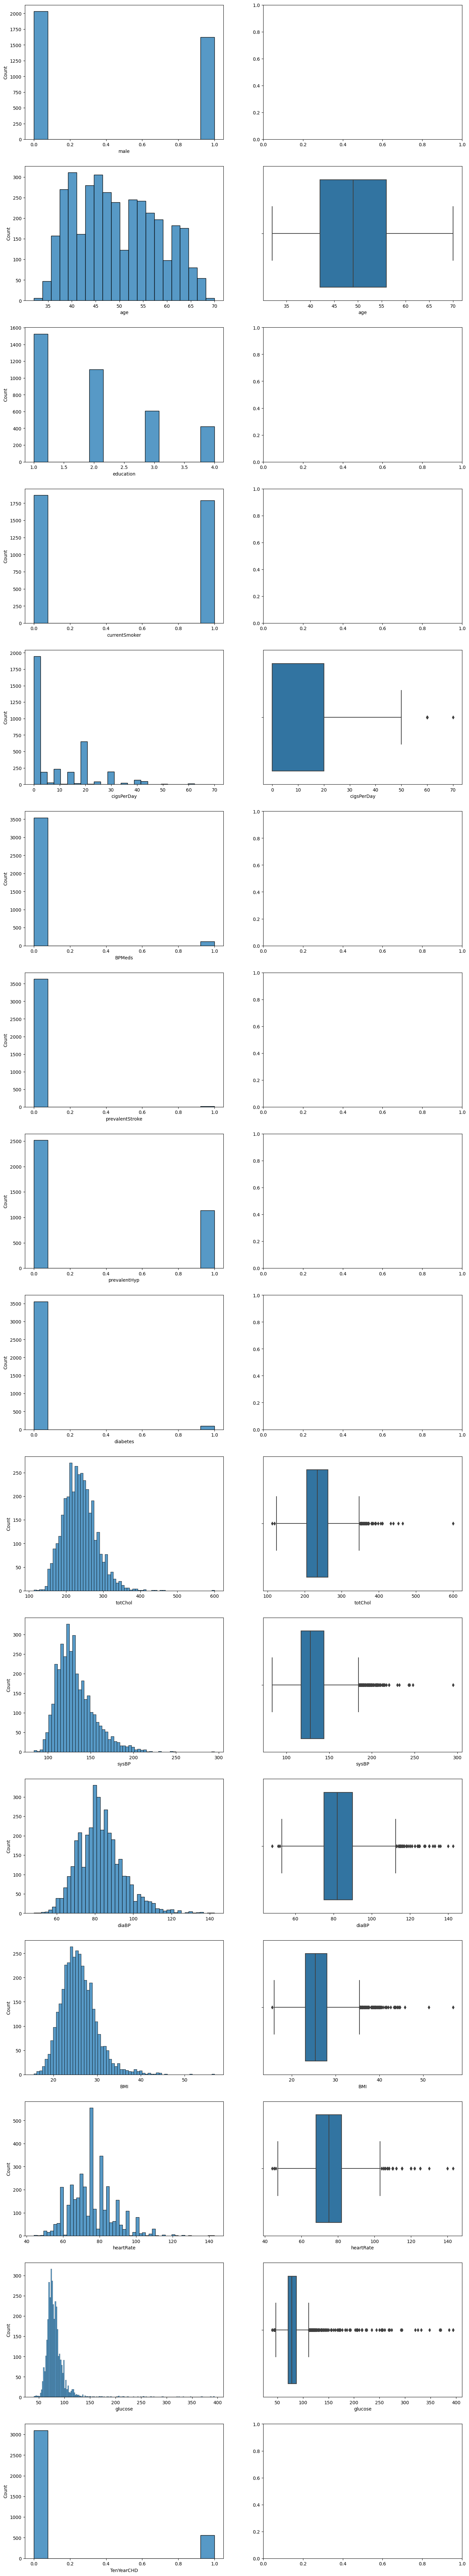

In [ ]:
# Distribution of the data

# Histograms
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(17, 100))
sns.histplot(data=med_data, x='male', ax=axes[0,0])
sns.histplot(data=med_data, x='age', ax=axes[1,0])
sns.histplot(data=med_data, x='education', ax=axes[2,0])
sns.histplot(data=med_data, x='currentSmoker', ax=axes[3,0])
sns.histplot(data=med_data, x='cigsPerDay', ax=axes[4,0])
sns.histplot(data=med_data, x='BPMeds', ax=axes[5,0])
sns.histplot(data=med_data, x='prevalentStroke', ax=axes[6,0])
sns.histplot(data=med_data, x='prevalentHyp', ax=axes[7,0])
sns.histplot(data=med_data, x='diabetes', ax=axes[8,0])
sns.histplot(data=med_data, x='totChol', ax=axes[9,0])
sns.histplot(data=med_data, x='sysBP', ax=axes[10,0])
sns.histplot(data=med_data, x='diaBP', ax=axes[11,0])
sns.histplot(data=med_data, x='BMI', ax=axes[12,0])
sns.histplot(data=med_data, x='heartRate', ax=axes[13,0])
sns.histplot(data=med_data, x='glucose', ax=axes[14,0])
sns.histplot(data=med_data, x='TenYearCHD', ax=axes[15,0])

# Box Plots
sns.boxplot(x=med_data['age'], ax=axes[1,1])
sns.boxplot(x=med_data['cigsPerDay'], ax=axes[4,1])
sns.boxplot(x=med_data['totChol'], ax=axes[9,1])
sns.boxplot(x=med_data['sysBP'], ax=axes[10,1])
sns.boxplot(x=med_data['diaBP'], ax=axes[11,1])
sns.boxplot(x=med_data['BMI'], ax=axes[12,1])
sns.boxplot(x=med_data['heartRate'], ax=axes[13,1])
sns.boxplot(x=med_data['glucose'], ax=axes[14,1])

# 3. This code will look at the descriptive statistics of the variables

In [ ]:
# Descriptive statistics
med_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# 4. This code will test variables for multicollinearity

<ipython-input-13-6c3dcb0447e8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(med_data.corr(), dtype=np.bool))


<Axes: >

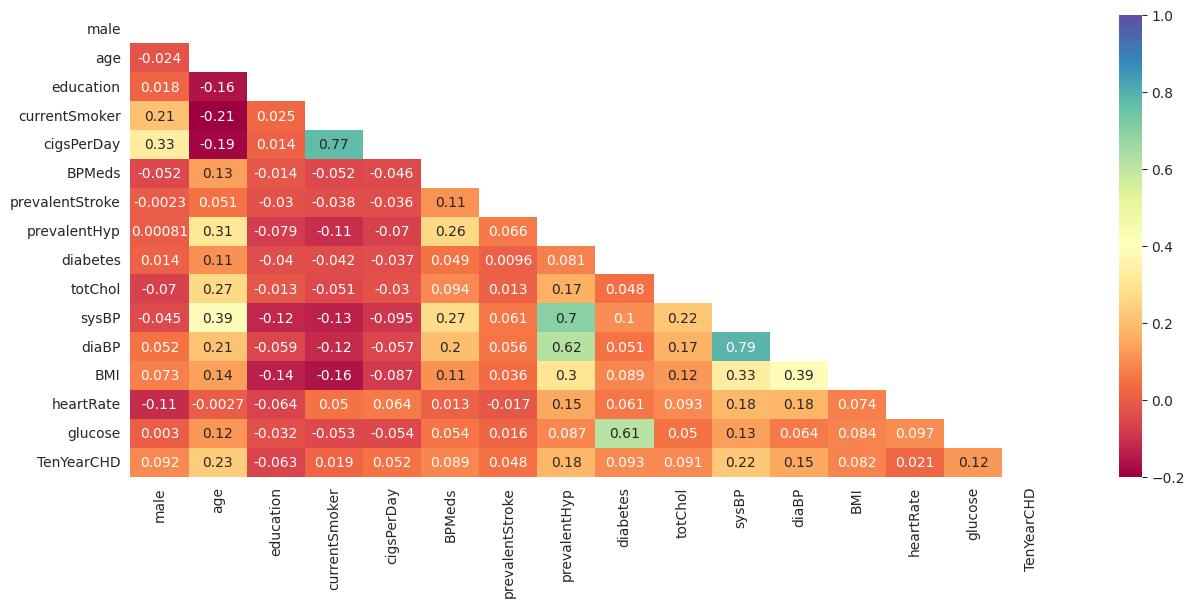

In [ ]:
# Multicollinearity test
plt.figure(figsize=(15, 6))
mask = np.triu(np.ones_like(med_data.corr(), dtype=np.bool))
sns.heatmap(med_data.corr(), mask=mask, annot=True, vmin=-0.2, vmax=1, cmap="Spectral")

# 5. This code will create a logistic regression Train model, evaluate the statistical significance of the variables, and examine the core performance indicators of the model. Additionally, the data will be split into four arrays (X_train, X_test, y_train, y_test)

In [ ]:
# Train Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import statsmodels.api as sm

predictors = med_data[['age', 'male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'cigsPerDay', 'glucose']]
outcome = med_data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=0)
X_train_with_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_with_const)
results = logit_model.fit()
aic = results.aic

print(results.summary())
print('AIC value is:', aic)

Optimization terminated successfully.
         Current function value: 0.378537
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2924
Model:                          Logit   Df Residuals:                     2908
Method:                           MLE   Df Model:                           15
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.1161
Time:                        12:51:57   Log-Likelihood:                -1106.8
converged:                       True   LL-Null:                       -1252.2
Covariance Type:            nonrobust   LLR p-value:                 4.790e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.5433      0.793    -10.774      0.000     -10.097      -6.989
age           

# 6. Since approximately two-thirds of the variables do not have statistical significance in the model, they are dropped, and the modeling process is repeated

In [ ]:
# Remove the variables that have a p-value > 0.05
predictors = med_data[['age', 'male', 'totChol', 'sysBP', 'cigsPerDay', 'glucose']]
outcome = med_data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=0)

X_train_with_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_with_const)
results = logit_model.fit()
aic = results.aic

print(results.summary())
print('AIC value is:', aic)


Optimization terminated successfully.
         Current function value: 0.379943
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2924
Model:                          Logit   Df Residuals:                     2917
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.1128
Time:                        12:52:02   Log-Likelihood:                -1111.0
converged:                       True   LL-Null:                       -1252.2
Covariance Type:            nonrobust   LLR p-value:                 4.651e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1060      0.527    -17.291      0.000     -10.138      -8.074
age            0.0625      0.

# 7. This code will create a confusion matrix for the Train Model, extract the numbers from it, and calculate the confusion matrix parameters

Train Model Results:
False Positive value: 30
False Negative value: 402
True Positive value: 46
True Negative value: 2446 

Confusion Matrix evaluation for the train set: 

Accuracy score is: 0.85
Precision score is: 0.61
Recall score is: 0.1
F1 score is: 0.18
Specificity score is:  0.99
False Negative Rate is:  0.9
False Positive Rate is:  0.01


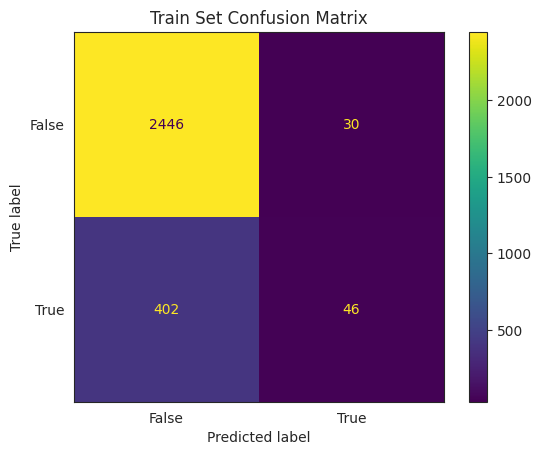

In [ ]:
# Train Model
X_train_with_const = sm.add_constant(X_train)
y_train_predict = results.predict(X_train_with_const)
y__train_predict_binary = (y_train_predict > 0.5).astype(int)  # change the y_train_predict value to change the threshold

conf_matrix = confusion_matrix(y_train, y__train_predict_binary)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
FalsePos = conf_matrix[0, 1]
FalseNeg = conf_matrix[1, 0]
TruePos = conf_matrix[1, 1]
TrueNeg = conf_matrix[0, 0]

print('Train Model Results:')
print('False Positive value:', FalsePos)
print('False Negative value:', FalseNeg)
print('True Positive value:', TruePos)
print('True Negative value:', TrueNeg, '\n')

acc_score_train = round(accuracy_score(y_train, y__train_predict_binary), 2)
pr_score__train = round(precision_score(y_train, y__train_predict_binary), 2)
recall__train = round(recall_score(y_train, y__train_predict_binary, pos_label=1), 2)
F1_train = round(f1_score(y_train, y__train_predict_binary), 2)
specif_train = round(TrueNeg / (TrueNeg + FalsePos), 2)
FNR_train = round(FalseNeg / (FalseNeg + TruePos), 2)
FPR_train = round(FalsePos / (FalsePos + TrueNeg), 2)

cm_display.plot()
plt.title('Train Set Confusion Matrix')

print('Confusion Matrix evaluation for the train set:', '\n')
print('Accuracy score is:', acc_score_train)
print('Precision score is:', pr_score__train)
print('Recall score is:', recall__train)
print('F1 score is:', F1_train)
print('Specificity score is: ', specif_train)
print('False Negative Rate is: ', FNR_train)
print('False Positive Rate is: ', FPR_train)

# 8. This code will apply the procedures outlined in codes 6 and 7 to the test model. The code is identical to codes 6 and 7, with the only difference being that the 'Train' keyword is replaced with 'Test'

Optimization terminated successfully.
         Current function value: 0.366412
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                  732
Model:                          Logit   Df Residuals:                      725
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.1293
Time:                        12:52:15   Log-Likelihood:                -268.21
converged:                       True   LL-Null:                       -308.03
Covariance Type:            nonrobust   LLR p-value:                 4.247e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2992      1.116     -8.329      0.000     -11.487      -7.111
age            0.0810      0.

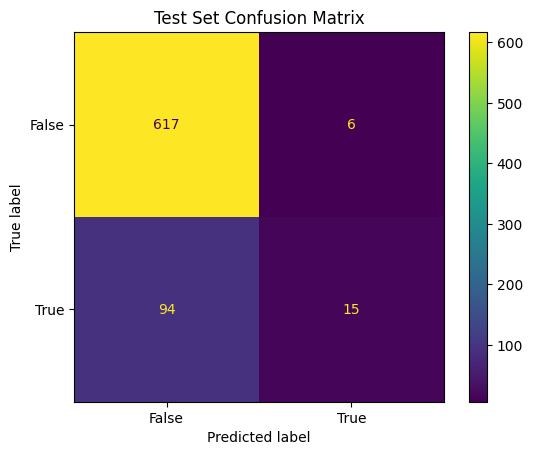

Confusion Matrix evaluation for the test set: 

Accuracy score is: 0.86
Precision score is: 0.71
Recall score is: 0.14
F1 score is: 0.23
Specificity score is:  0.99
False Negative Rate is:  0.86
False Positive Rate is:  0.01


In [ ]:
# Test Model
X_test_with_const = sm.add_constant(X_test)
logit_model = sm.Logit(y_test, X_test_with_const)
results = logit_model.fit()
aic = results.aic
print(results.summary())
print('AIC value is:', aic, '\n')

X_test_with_const = sm.add_constant(X_test)
y_test_predict = results.predict(X_test_with_const)
y_test_predict_binary = (y_test_predict > 0.5).astype(int)  # change the y_test_predict value to change the threshold

conf_matrix_test = confusion_matrix(y_test, y_test_predict_binary)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=[False, True])

FalsePos_test = conf_matrix_test[0, 1]
FalseNeg_test = conf_matrix_test[1, 0]
TruePos_test = conf_matrix_test[1, 1]
TrueNeg_test = conf_matrix_test[0, 0]

print('Test Set Results:')
print('False Positive value:', FalsePos_test)
print('False Negative value:', FalseNeg_test)
print('True Positive value:', TruePos_test)
print('True Negative value:', TrueNeg_test, '\n')

acc_score_test = round(accuracy_score(y_test, y_test_predict_binary), 2)
pr_score_test = round(precision_score(y_test, y_test_predict_binary), 2)
recall_test = round(recall_score(y_test, y_test_predict_binary, pos_label=1), 2)
F1_test = round(f1_score(y_test, y_test_predict_binary), 2)
specif_test = round(TrueNeg_test / (TrueNeg_test + FalsePos_test), 2)
FNR_test = round(FalseNeg_test / (FalseNeg_test + TruePos_test), 2)
FPR_test = round(FalsePos_test / (FalsePos_test + TrueNeg_test), 2)

cm_display_test.plot()
plt.title('Test Set Confusion Matrix')
plt.show()

print('Confusion Matrix evaluation for the test set:', '\n')
print('Accuracy score is:', acc_score_test)
print('Precision score is:', pr_score_test)
print('Recall score is:', recall_test)
print('F1 score is:', F1_test)
print('Specificity score is: ', specif_test)
print('False Negative Rate is: ', FNR_test)
print('False Positive Rate is: ', FPR_test)


# 9. This code will plot the ROC curve and calculate the AUC for the Train and Test models

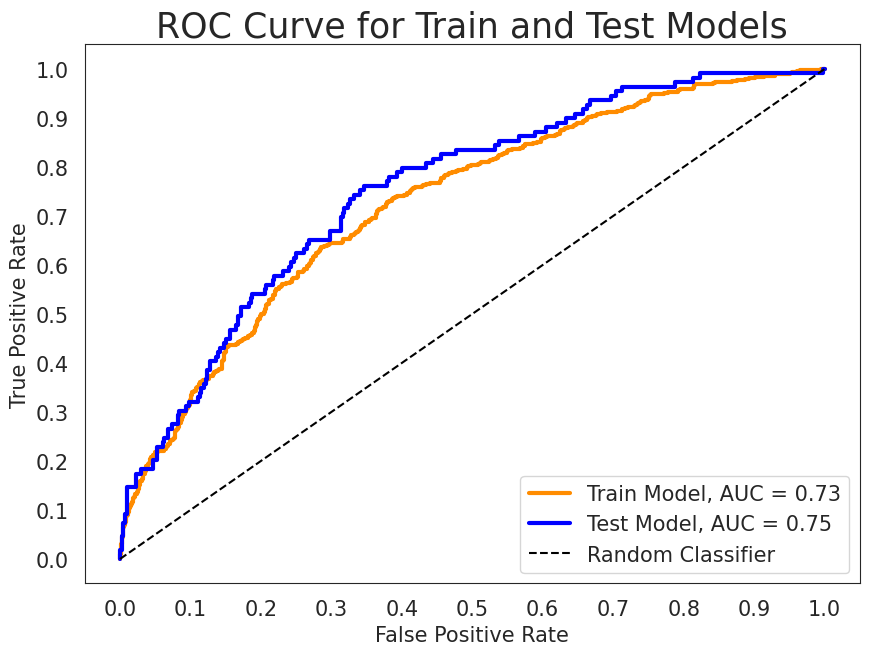

In [ ]:
# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_predict)
roc_auc_train = auc(fpr, tpr)
roc_auc_test = auc(fpr_test, tpr_test)

sns.set_style('white')
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', label='Train Model, AUC = {:.2}'.format(roc_auc_train), linewidth=3)
plt.plot(fpr_test, tpr_test, color='blue', label='Test Model, AUC = {:.2}'.format(roc_auc_test), linewidth=3)
plt.plot([0, 1], [0, 1], color='black', label='Random Classifier', linestyle='--')

ax = plt.gca()

plt.title('ROC Curve for Train and Test Models', size=25)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.legend(loc='lower right', fontsize=15)
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.tick_params(axis='both', which='major', labelsize=15, length=8, width=2, color='black', direction='out')

# Conclusions :
# 1. This model is unfit to be used for medical purposes since half of the variables are imbalanced
# 2. The AIC and AUC parameters are too low for medical purposes
# 3. Two-thirds of the variables do not exhibit a statistically significant difference in the model
# 4. Both the Train and Test models showed high scores for Accuracy and Specificity, although extremely low F1 and Recall scores. These can be increased by changing the threshold to 0.1 but at the cost of lowering Accuracy, Precision and Specificity
# 5. The model is unfit for medical purposes due to the poor confusion matrix parameters
# 6. This model is suitable for research purposes with a prophylactic meaning (threshold = 0.5) and prediction of the disease (threshold = 0.1)
# 7. The Train and Test models performed relatively the same. The drop in p-value for the 'totChol' variable may be a result of the small sample size, disproportionate data, etc